# Будем определять качество белового вина

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('winequality-white.csv', sep=';')


# 1. EDA

In [2]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
data.shape

(4898, 12)

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# 2. Preprocessing

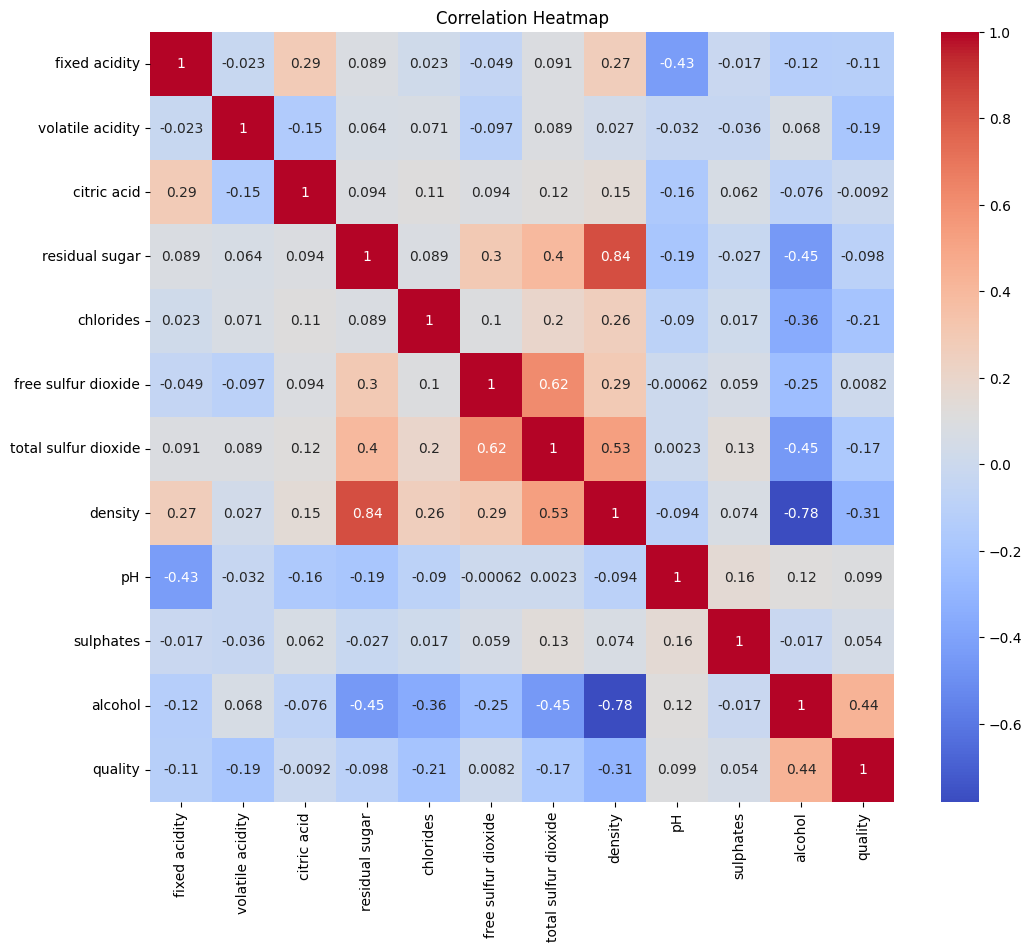

In [6]:
# Матрица корреляций
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [7]:
# Убираем столбцы с коэффициентами корреляции с целевой переменной ниже threshold

correlations_with_quality = data.corr()['quality']

correlation_threshold = 0.15

weak_correlation_columns = correlations_with_quality[abs(correlations_with_quality) < correlation_threshold].index

data.drop(columns=weak_correlation_columns, inplace=True)
print(data)

      volatile acidity  chlorides  total sulfur dioxide  density  alcohol  \
0                 0.27      0.045                 170.0  1.00100      8.8   
1                 0.30      0.049                 132.0  0.99400      9.5   
2                 0.28      0.050                  97.0  0.99510     10.1   
3                 0.23      0.058                 186.0  0.99560      9.9   
4                 0.23      0.058                 186.0  0.99560      9.9   
...                ...        ...                   ...      ...      ...   
4893              0.21      0.039                  92.0  0.99114     11.2   
4894              0.32      0.047                 168.0  0.99490      9.6   
4895              0.24      0.041                 111.0  0.99254      9.4   
4896              0.29      0.022                 110.0  0.98869     12.8   
4897              0.21      0.020                  98.0  0.98941     11.8   

      quality  
0           6  
1           6  
2           6  
3          

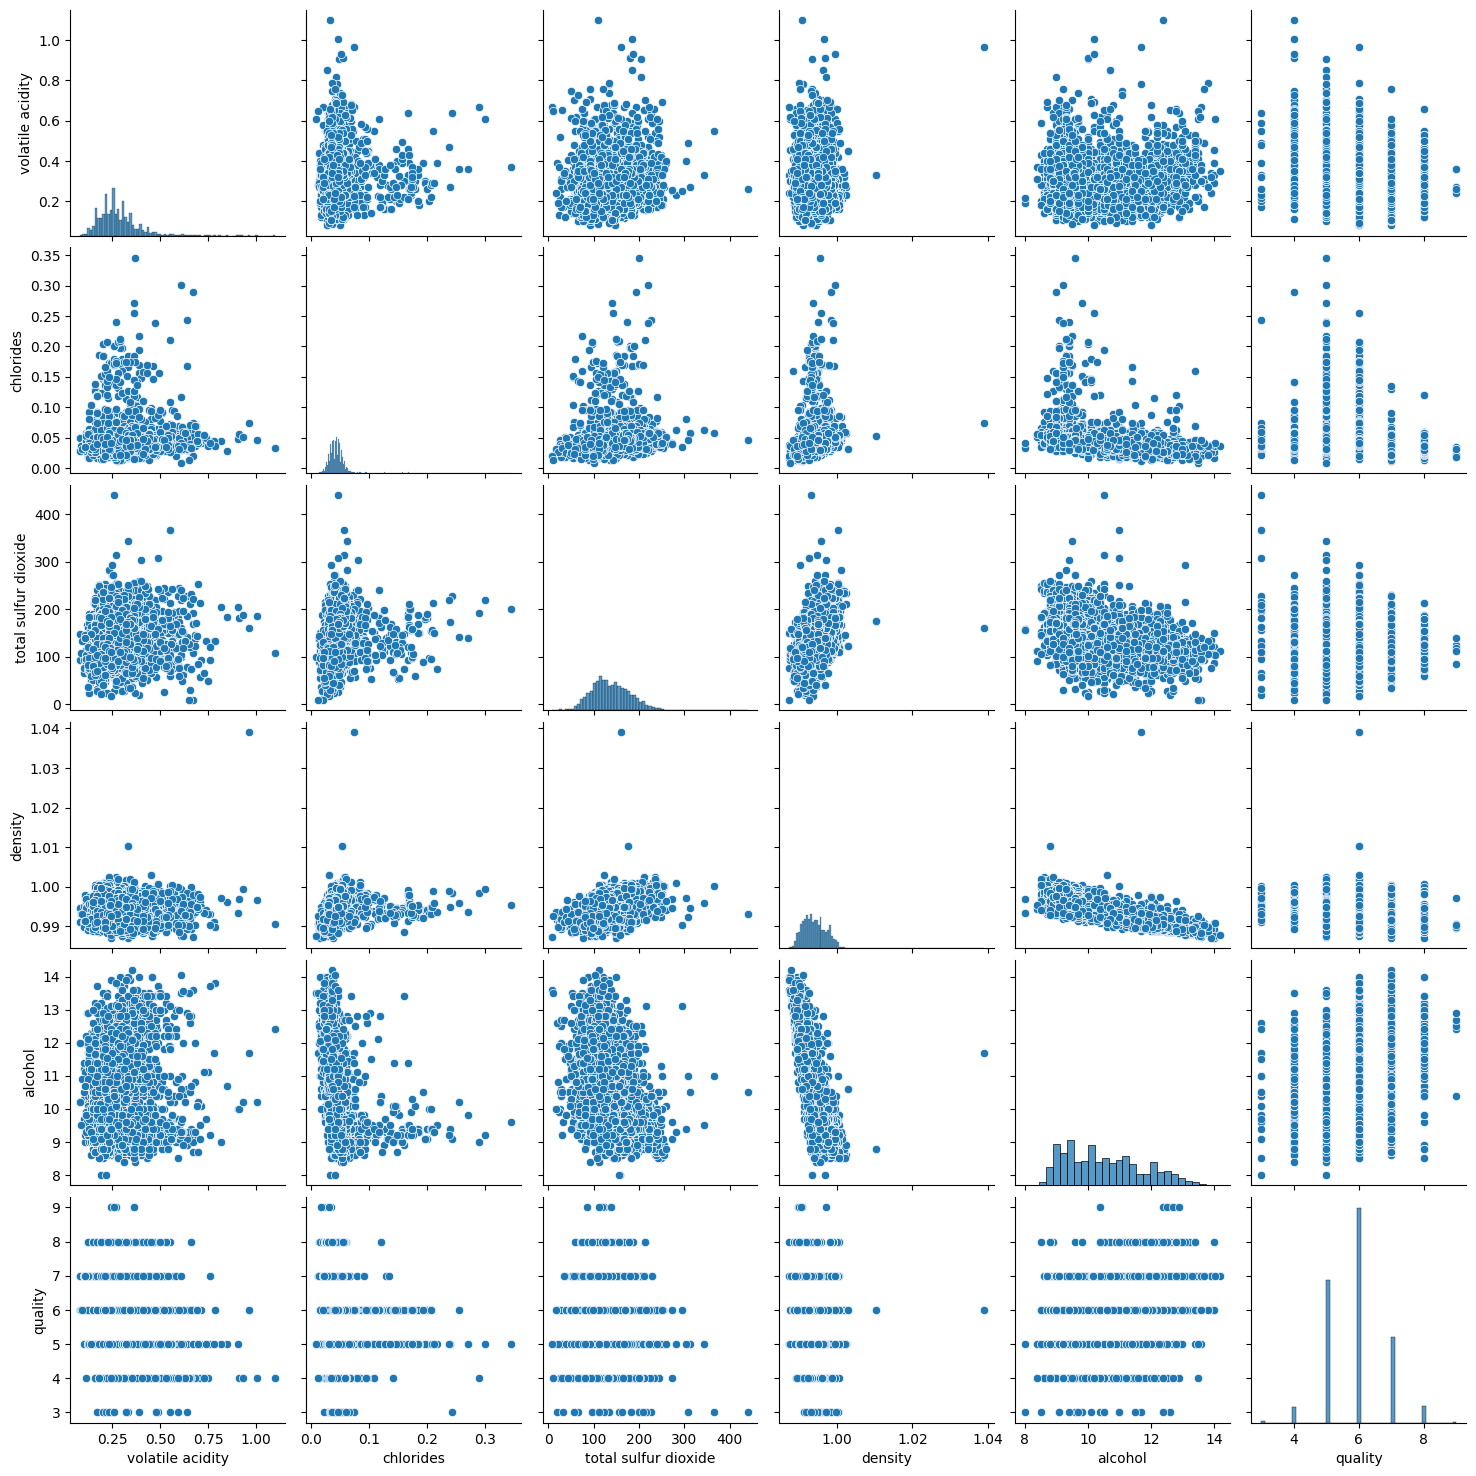

In [8]:
sns.pairplot(data)
plt.show()

In [9]:
X, y = data.drop(['quality'], axis=1), data['quality']

# Train Test Validation

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val,  y_train, y_val  = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
X_val   = scaler.transform(X_val)

def test_train_error(test_pred, train_pred):
    print("Test  MSE = %.4f" % mean_squared_error(y_test, test_pred))
    print("Train MSE = %.4f" % mean_squared_error(y_train, train_pred))
    print("\n")
    print("Test  MAE = %.4f" % mean_absolute_error(y_test, test_pred))
    print("Train MAE = %.4f" % mean_absolute_error(y_train, train_pred))

# sklearn GradientBoostingRegressor

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

sgbr = GradientBoostingRegressor().fit(X_train, y_train)
test_train_error(sgbr.predict(X_test), sgbr.predict(X_train))

Test  MSE = 0.5437
Train MSE = 0.4510


Test  MAE = 0.5766
Train MAE = 0.5243


# XGBoost

In [13]:
from xgboost import XGBRegressor

xgbr = XGBRegressor().fit(X_train, y_train)
test_train_error(xgbr.predict(X_test), xgbr.predict(X_train))

Test  MSE = 0.5013
Train MSE = 0.0915


Test  MAE = 0.5203
Train MAE = 0.2133


# CatBoost

In [14]:
from catboost import CatBoostRegressor 

catgbr = CatBoostRegressor(logging_level='Silent').fit(X_train, y_train)
test_train_error(catgbr.predict(X_test), catgbr.predict(X_train))

Test  MSE = 0.5042
Train MSE = 0.2667


Test  MAE = 0.5391
Train MAE = 0.3930


# LightGBM

In [15]:
from lightgbm import LGBMRegressor

lgbmr = LGBMRegressor(verbosity=-1).fit(X_train, y_train)
test_train_error(lgbmr.predict(X_test), lgbmr.predict(X_train))

Test  MSE = 0.4961
Train MSE = 0.2783


Test  MAE = 0.5397
Train MAE = 0.3988


**Сравниваем версии "из под капота" на валидационной выборке** 

In [16]:

def val(prediction, name):
    print(name, " val MSE = %.4f" % mean_squared_error(y_val,  prediction))
    print(name, " val MAE = %.4f" % mean_absolute_error(y_val, prediction))   
    print("\n")    

val(sgbr.predict(X_val), 'sklearn')
val(xgbr.predict(X_val), 'xgboost')
val(catgbr.predict(X_val), 'catboost')
val(lgbmr.predict(X_val), 'lightgbm')

sklearn  val MSE = 0.5493
sklearn  val MAE = 0.5838


xgboost  val MSE = 0.4729
xgboost  val MAE = 0.5177


catboost  val MSE = 0.5111
catboost  val MAE = 0.5564


lightgbm  val MSE = 0.5090
lightgbm  val MAE = 0.5574




# 3. Подбор гиперпараметров

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],  # количество базовых моделей
    'learning_rate': [0.01, 0.05, 0.1],  # скорость обучения
    'max_depth': [3, 5, 7],  # максимальная глубина деревьев
    'subsample': [0.8, 0.9, 1.0]  # доля обучающих выборок для каждого дерева
}

cv = 5
scoring = 'neg_mean_squared_error'

def grid_search(estimator, name):
    grid_search = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        cv=cv,
        scoring=scoring
    ).fit(X_train, y_train)

    print("Лучшие параметры для ", name, grid_search.best_params_)
    print("Лучший score для ", name, grid_search.best_score_)
    val(grid_search.predict(X_val), name)

**Подбор для sklearn**

In [18]:
grid_search(GradientBoostingRegressor(), 'sklearn')

Лучшие параметры для  sklearn {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Лучший score для  sklearn -0.48764879297877506
sklearn  val MSE = 0.4917
sklearn  val MAE = 0.5232




**Подбор для XGBoost**

In [19]:
grid_search(XGBRegressor(), 'xgboost')

Лучшие параметры для  xgboost {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Лучший score для  xgboost -0.48462968882878127
xgboost  val MSE = 0.4915
xgboost  val MAE = 0.5287




**Подбор для СatBoost**

In [20]:
grid_search(CatBoostRegressor(logging_level='Silent'), 'catboost')

Лучшие параметры для  catboost {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Лучший score для  catboost -0.5011643079488757
catboost  val MSE = 0.5448
catboost  val MAE = 0.5772




**Подбор для LightGBM**

In [21]:
grid_search(LGBMRegressor(verbosity=-1), 'lightGBM')

Лучшие параметры для  lightGBM {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Лучший score для  lightGBM -0.5200917838151637
lightGBM  val MSE = 0.5121
lightGBM  val MAE = 0.5631




**Побеждает xgboost**